In [3]:
### Importer les modules ###
import os
import glob
import scipy
import pylab
import tables
import pyphot
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt

from scipy import signal
from scipy.fftpack import fft, fftshift


http://www.astro.caltech.edu/sedm/Efficiency.html
### Définir les constantes ###
h = 6.62606885e-27  #erg s
hc = 1.98782e-8  #erg A

### Les paramètres données ###
A_tel = 18  #cm^2, area of the primary mirror accounting for the secondary obstruction
A_tel_eff = 14.742  # = A_tel*0.91*0.9, reflectivity 91% for the primary and 90% for the secondary

### Optical Design Info ###


# Optical Design Info
R ~ 4500, with a 1" slit
350 - 2000nm band

## UV-VIS
Collimator Focal Ratio = 6.5 <br>
COllimator Beam diameter = 45 mm <br>
Spectral range = 350-850 nm <br>
Resolution (1 arcsec slit) = 3500-7000 <br>
Slit scale = 110 μm/" <br>
Foreseen slit widths = 0.5" − 1.0" − 1.5" − 5" <br>
Slit height = 12" <br>
Camera Output Focal Ratio = 3.11 <br>
Detector = Teledyne e2V CCD44-82 <br>
Detector Scale = ∼ 53 μm/" <br>
Main Disperser = Four custom ion etched gratings <br>
Working temperature = Ambient (-5°C − +25°C) <br>






In [98]:
### Average resolution ###
R_u = 4995
R_g = 4634
R_r = 4633
R_i = 4601
# sigma
dR_u = 1059
dR_g = 890
dR_r = 909
dR_i = 878

# delta lambda - limit of resolution

N_pas = 100000

### wavelength range ### (nm)
u = np.linspace(350.0,440.0,N_pas)
g = np.linspace(427.0,545.0,N_pas)
r = np.linspace(522.0,680.0,N_pas)
i = np.linspace(656.0,850.0,N_pas)

### Throughput ###
# Total expected
Thr_u = 0.741
Thr_g = 0.737
Thr_r = 0.749
Thr_i = 0.726
# w/ contingency at 2% to all estimates
thr_u = 0.643
thr_g = 0.627
thr_r = 0.663
thr_i = 0.630

# Line Density (lines/mm) -> (lines/nm)
ld_u = 3380*10**-6
ld_g = 2655*10**-6
ld_r = 2070*10**-6
ld_i = 1660*10**-6

# Line Spacing d = Line Density ^-1
d_u = ld_u**-1
d_g = ld_g**-1
d_r = ld_r**-1
d_i = ld_i**-1

# Feed Angle
alpha = 41*np.pi/180. # ◦ -> rad 

# lambda Littrow (nm)
ll_u = 388.2
ll_g = 494.2
ll_r = 633.9
ll_i = 790.4

# pixel (m)
pix_x = 15*10**-6
pix_y = 15*10**-6

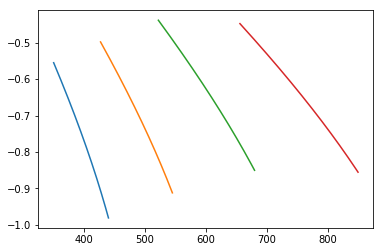

In [103]:
# disspersion angle (m=1)
da_u = np.arcsin(np.sin(alpha) - u*ld_u)
da_g = np.arcsin(np.sin(alpha) - g*ld_g)
da_r = np.arcsin(np.sin(alpha) - r*ld_r)
da_i = np.arcsin(np.sin(alpha) - i*ld_i)
plt.plot(u,da_u)
plt.plot(g,da_g)
plt.plot(r,da_r)
plt.plot(i,da_i)

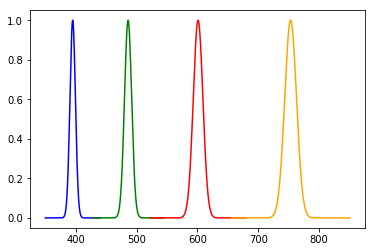

In [54]:
# Générer un signal gaussian
# M = np.size(u)+np.size(g)+np.size(r)+np.size(i)
# x = np.linspace(350.0,850.0,M)
Gauss = signal.gaussian(N_pas, std=5000, sym=False)
plt.plot(u,Gauss,'b')
plt.plot(g,Gauss,'g')
plt.plot(r,Gauss,'r')
plt.plot(i,Gauss,'orange')
plt.show()

# slow af
from random import gauss
mean = (850+350)*0.5
stdDev = 500
Gauss_1 = [gauss(mean,stdDev) for i in range(M)]
n, bins, patches = plt.hist(Gauss_1, M, facecolor='green', alpha=0.5)
#plt.plot(x,Gauss_1)
#plt.xlim(350,850)
plt.show()

In [ ]:
# Read and save ascii files
input_data = ascii.read(".ascii")

In [ ]:
# binning code from Rachel
lamda = 
lamda_1st = lamda[0]
lamda_last = lamda[-1]
def bin_spectra(spectrum, resolution):
    n_bin = math.floor((lamda_last - lamda_1st)/resolution)
    
    #performs the data rebinning by taking the beam of the fluc value inside the bin
    stat, bin_edge, inde = scipy.stats.binned_statistic(lamda, flux_unred, statistic='mean', 
                                                        bins = n_bin)
    
    
    bin_wavelength = [ (bin_edge[i]+ bin_edge[i+1])/2 for i in range(len(bin_edge)-1) ]
    bin_spectra = Table()
    bin_spectra['bin_wl'] = bin_wavelength
    bin_spectra['bin_unred_flux'] = stat
    
    return bin_spectra